Storytelling Project Specifications

Scenario:
You’re working as a Data Scientist at a Telecommunications company and the VP of Operations comes to you and says, “We need to reduce customer attrition! Our customers are leaving us for competitors at way too high a rate. Our VP of Sales says removing the month-to-month plan is NOT an option. I already know those customers leave the most, so I want you to focus on only the customers on the Month-to-Month plan. What do you think is driving them to churn? What can we do to try to keep these customers from leaving?”

Business Goal:
Reduce customer attrition, a.k.a. Churn, among the customers on the month-to-month plan. Why? Because keeping customers is cheaper than getting new customers. 

Project Goal:
A 3 minute presentation that communicates what you found, what your recommendation is, and how you expect the recommended action(s) to decrease the attrition. Your presentation will include: 
a chart that undeniably demonstrates the source of attrition that you focused on.
a single recommendation, backed by data, that we would expect to reduce some of the attrition we are seeing.
a chart that visualizes what you would expect to see, in terms of reduction in churn, if the recommendation is taken.

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

In [2]:
from env import username, password, host
def get_db_url(username, password, host):
    url = f'mysql+pymysql://{username}:{password}@{host}/telco_churn'
    return url

In [3]:
url = get_db_url(username, password, host)

In [5]:
tables = pd.read_sql("SHOW TABLES", url)
tables

,Tables_in_telco_churn
0,contract_types
1,customers
2,internet_service_types
3,payment_types


In [6]:
contract_types_structure = pd.read_sql('''DESCRIBE contract_types''', url)
contract_types_structure

,Field,Type,Null,Key,Default,Extra
0,contract_type_id,bigint,NO,PRI,None,
1,contract_type,text,YES,,None,


In [7]:
customers_structure = pd.read_sql('''DESCRIBE customers''', url)
customers_structure

,Field,Type,Null,Key,Default,Extra
0,customer_id,char(10),NO,PRI,None,
1,gender,text,YES,,None,
2,senior_citizen,bigint,YES,,None,
3,partner,text,YES,,None,
4,dependents,text,YES,,None,
5,tenure,bigint,YES,,None,
6,phone_service,text,YES,,None,
7,multiple_lines,text,YES,,None,
8,internet_service_type_id,bigint,YES,MUL,None,
9,online_security,text,YES,,None,


In [8]:
internet_service_types_structure = pd.read_sql('''DESCRIBE internet_service_types''', url)
internet_service_types_structure

,Field,Type,Null,Key,Default,Extra
0,internet_service_type_id,bigint,NO,PRI,None,
1,internet_service_type,text,YES,,None,


In [9]:
payment_types_structure = pd.read_sql('''DESCRIBE payment_types''', url)
payment_types_structure

,Field,Type,Null,Key,Default,Extra
0,payment_type_id,bigint,NO,PRI,None,
1,payment_type,text,YES,,None,


In [10]:
contract_types = pd.read_sql('''contract_types''', url)
contract_types

,contract_type_id,contract_type
0,1,Month-to-month
1,2,One year
2,3,Two year


In [11]:
customers = pd.read_sql('''customers''', url)
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [13]:
internet_service_types = pd.read_sql('''internet_service_types''', url)
internet_service_types

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [14]:
payment_types = pd.read_sql('''payment_types''', url)
payment_types

,payment_type_id,payment_type
0,1,Electronic check
1,2,Mailed check
2,3,Bank transfer (automatic)
3,4,Credit card (automatic)


In [15]:
monthly_customers = customers[customers["contract_type_id"] == 1]
monthly_customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No
7036,9985-MWVIX,Female,0,No,No,1,Yes,No,2,No,...,No,No,No,No,1,Yes,2,70.15,70.15,Yes
7037,9986-BONCE,Female,0,No,No,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,20.95,85.5,Yes
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes


In [16]:
pearsoncorr = customers.corr(method = 'pearson')
pearsoncorr

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
senior_citizen,1.000000,0.016567,-0.032310,-0.142554,-0.093704,0.220173
tenure,0.016567,1.000000,-0.030359,0.671607,0.340305,0.247900
internet_service_type_id,-0.032310,-0.030359,1.000000,0.099721,0.008124,-0.323260
contract_type_id,-0.142554,0.671607,0.099721,1.000000,0.358913,-0.074195
payment_type_id,-0.093704,0.340305,0.008124,0.358913,1.000000,-0.074353
monthly_charges,0.220173,0.247900,-0.323260,-0.074195,-0.074353,1.000000


<AxesSubplot:>

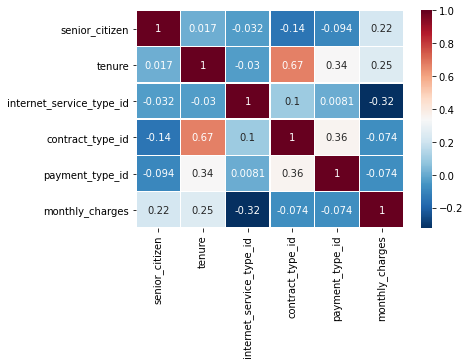

In [17]:
sns.heatmap(pearsoncorr, 
            xticklabels = pearsoncorr.columns,
            yticklabels = pearsoncorr.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 0.5)

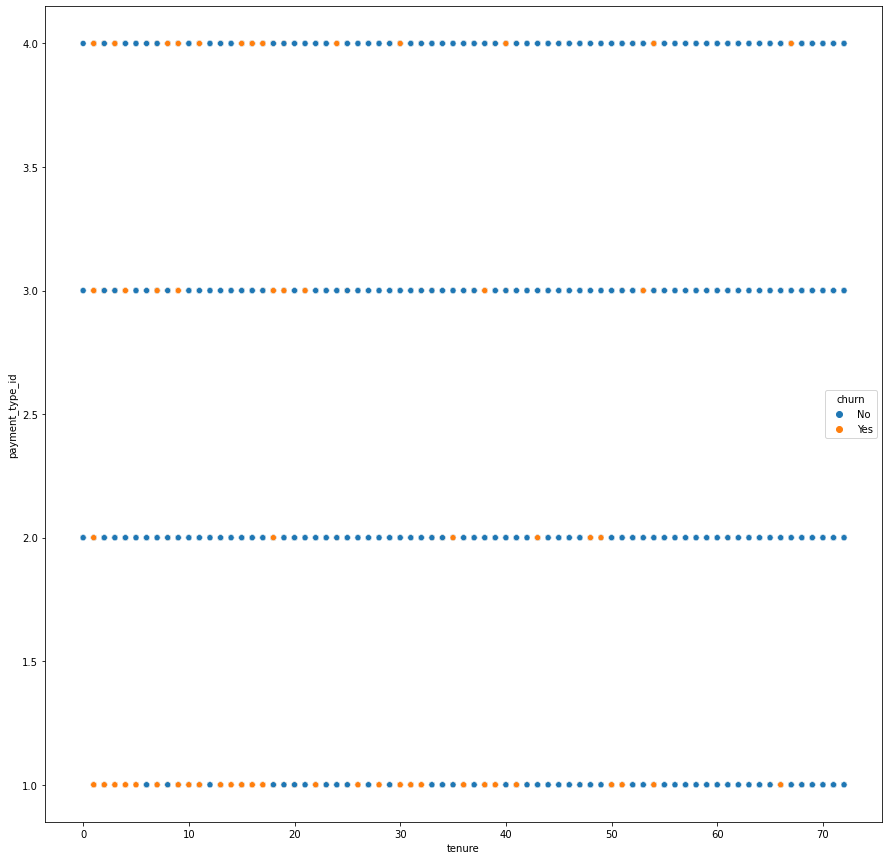

In [18]:
fig, first = plt.subplots(figsize=(15, 15))
first = sns.scatterplot(data = customers, x = "tenure", y = "payment_type_id", hue = "churn")

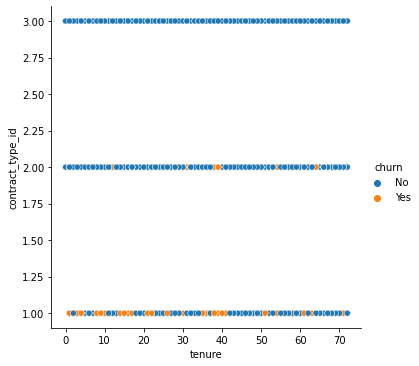

In [19]:
sns.relplot(data = customers, x = "tenure", y = "contract_type_id", hue = "churn")

<AxesSubplot:xlabel='payment_type_id', ylabel='contract_type_id'>

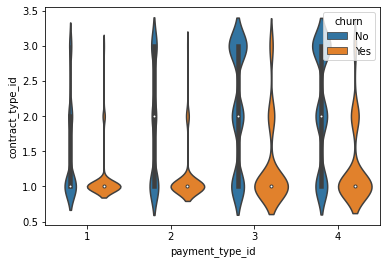

In [20]:
sns.violinplot(data = customers, x = "payment_type_id", y = "contract_type_id", hue = "churn")

<AxesSubplot:xlabel='streaming_movies', ylabel='senior_citizen'>

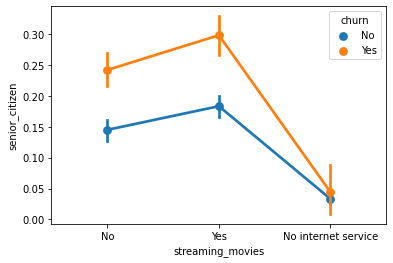

In [21]:
sns.pointplot(data = customers, x = "streaming_movies", y = "senior_citizen", hue = "churn")

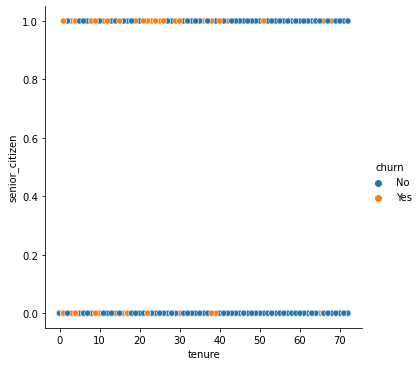

In [22]:
sns.relplot(data = customers, x = "tenure", y = "senior_citizen", hue = "churn")

<AxesSubplot:xlabel='payment_type_id', ylabel='churn'>

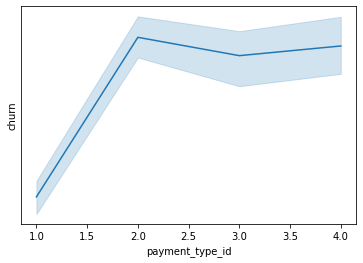

In [23]:
sns.lineplot(data = monthly_customers, x = "payment_type_id", y = "churn")

In [24]:
yearly_customers = customers[customers["contract_type_id"] == 2]
yearly_customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
16,0020-JDNXP,Female,0,Yes,Yes,34,No,No phone service,1,Yes,...,Yes,Yes,Yes,Yes,2,No,2,61.25,1993.2,No
18,0022-TCJCI,Male,1,No,No,45,Yes,No,1,Yes,...,Yes,No,No,Yes,2,No,4,62.70,2791.5,Yes
20,0023-UYUPN,Female,1,Yes,No,50,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,1,25.20,1306.3,No
26,0036-IHMOT,Female,0,Yes,Yes,55,Yes,No,2,No,...,Yes,Yes,Yes,Yes,2,Yes,3,103.70,5656.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,9968-FFVVH,Male,0,No,No,63,Yes,Yes,1,Yes,...,Yes,Yes,No,No,2,No,3,68.80,4111.35,No
7030,9972-VAFJJ,Female,1,Yes,No,53,Yes,No,2,No,...,Yes,Yes,Yes,No,2,Yes,1,94.00,4871.45,No
7034,9978-HYCIN,Male,1,Yes,Yes,47,Yes,No,2,No,...,No,No,Yes,No,2,Yes,3,84.95,4018.05,No
7035,9979-RGMZT,Female,0,No,No,7,Yes,No,2,No,...,No,No,Yes,Yes,2,Yes,2,94.05,633.45,No


In [25]:
two_year_customers = customers[customers["contract_type_id"] == 3]
two_year_customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.8,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No
10,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,Yes,Yes,No,3,No,4,45.20,2460.55,No
11,0017-IUDMW,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,4,116.80,8456.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,Yes,4,24.40,1725.4,No
7028,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No
7032,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


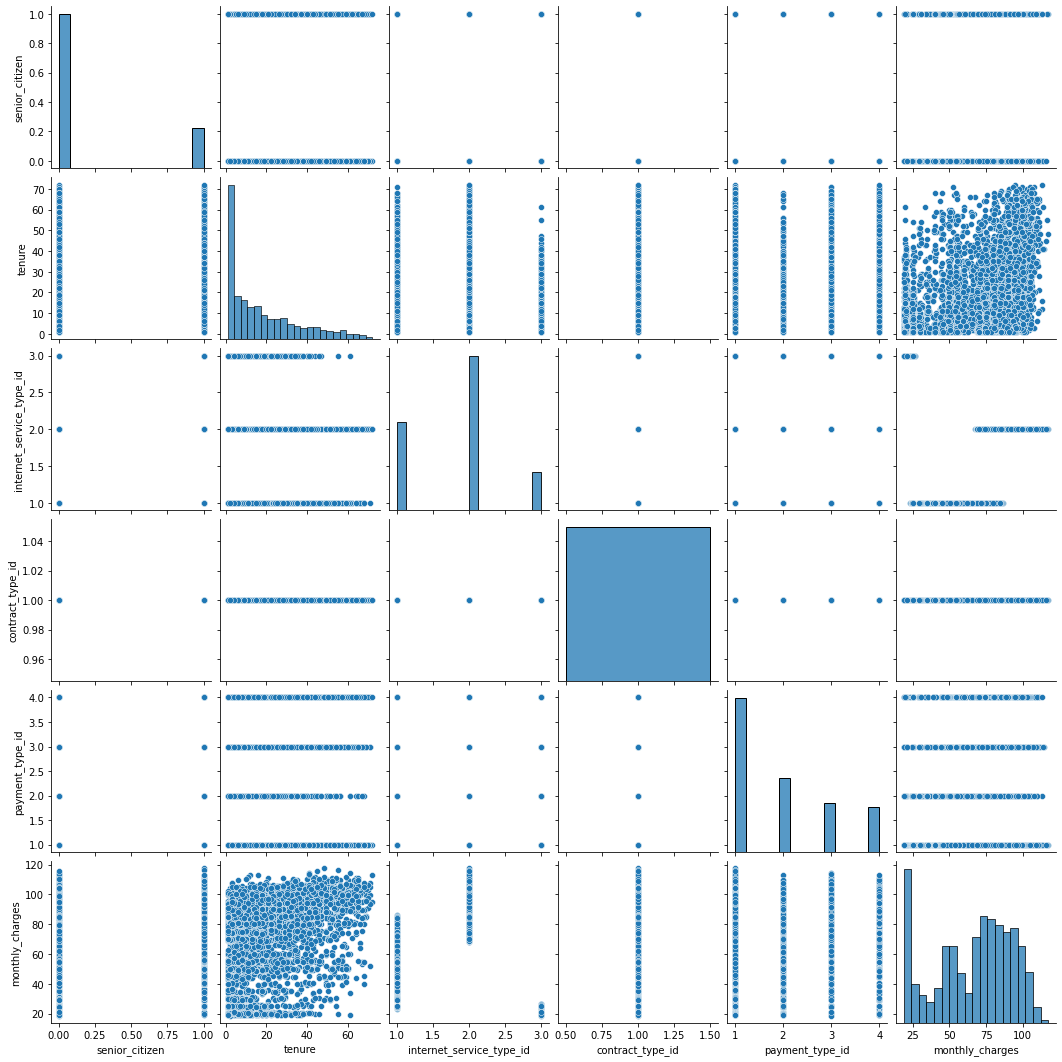

In [26]:
sns.pairplot(data = monthly_customers)

In [27]:
spreadsheet = pd.read_excel("Spreadsheets_Exercises_Solutions.xlsx", sheet_name = "mytable_customer_details_values", header = 1)
spreadsheet

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,True,False,3,2020-02-11 00:00:00.000,0.00,False,2 Year,No Phone Service,DSL,Internet Only
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,False,False,3,2020-02-11 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,Phone Only
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,True,True,2,2020-02-11 00:00:00.000,0.00,False,2 Year,Two or More Lines,DSL,Phone+Internet
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,False,False,3,2020-02-11 00:00:00.000,0.00,False,1 Year,One Line,No Internet Service,Phone Only
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,False,False,2,2020-02-11 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,Phone Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3910-MRQOY,Female,0,Yes,No,1,0,2,Bank transfer (automatic),19.40,...,False,False,1,2013-09-08 18:17:00.619,19.40,True,2 Year,One Line,No Internet Service,Phone Only
7039,6010-DDPPW,Male,0,Yes,No,2,0,2,Bank transfer (automatic),25.15,...,False,False,1,2013-09-07 17:11:19.920,25.15,True,2 Year,Two or More Lines,No Internet Service,Phone Only
7040,7083-MIOPC,Female,0,No,No,1,0,2,Credit card (automatic),20.25,...,False,False,0,2013-09-01 10:13:20.000,20.25,True,2 Year,One Line,No Internet Service,Phone Only
7041,8207-VVMYB,Female,0,Yes,No,2,0,2,Bank transfer (automatic),26.00,...,False,False,1,2013-09-07 03:01:09.231,26.00,True,2 Year,Two or More Lines,No Internet Service,Phone Only


In [28]:
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               7043 non-null   object        
 1   gender                    7043 non-null   object        
 2   is_senior_citizen         7043 non-null   int64         
 3   partner                   7043 non-null   object        
 4   dependents                7043 non-null   object        
 5   phone_service             7043 non-null   int64         
 6   internet_service          7043 non-null   int64         
 7   contract_type             7043 non-null   int64         
 8   payment_type              7043 non-null   object        
 9   monthly_charges           7043 non-null   float64       
 10  total_charges             7032 non-null   float64       
 11  churn                     7043 non-null   object        
 12  tenure              

In [29]:
pearsoncorr = spreadsheet.corr(method = 'pearson')
pearsoncorr

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_monthly_charges,validate_monthly_charges
is_senior_citizen,1.000000,0.113791,0.259390,-0.142554,0.220173,0.102411,0.016107,0.001874,0.150889,0.008576,0.182742,0.167749,-0.151073,0.220525,0.017399
phone_service,0.113791,1.000000,0.307988,0.083343,0.490700,0.412495,0.258792,0.009451,0.036310,0.675070,0.082560,0.503650,0.033120,0.489895,0.008812
internet_service,0.259390,0.307988,1.000000,-0.290189,0.905491,0.428212,0.032938,0.010380,0.316846,0.093720,0.825819,0.793101,-0.134267,0.904461,0.039020
contract_type,-0.142554,0.083343,-0.290189,1.000000,-0.074195,0.450306,0.671321,-0.000126,-0.396713,0.002247,-0.242388,-0.213817,0.301843,-0.077252,-0.057812
monthly_charges,0.220173,0.490700,0.905491,-0.074195,1.000000,0.651065,0.247633,0.014569,0.193356,0.247398,0.763557,0.835774,-0.045625,0.998086,0.030685
total_charges,0.102411,0.412495,0.428212,0.450306,0.651065,1.000000,0.826241,-0.000048,-0.199484,0.113008,0.374878,0.404842,0.178438,0.651065,NaN
tenure,0.016107,0.258792,0.032938,0.671321,0.247633,0.826241,1.000000,-0.004522,-0.351726,0.008398,0.038591,0.039624,0.273160,0.249789,0.052051
is_female,0.001874,0.009451,0.010380,-0.000126,0.014569,-0.000048,-0.004522,1.000000,0.008612,0.006488,0.006026,0.009487,-0.007121,0.013992,0.003219
has_churned,0.150889,0.036310,0.316846,-0.396713,0.193356,-0.199484,-0.351726,0.008612,1.000000,0.011942,0.227890,0.209988,-0.184012,0.194125,0.023771
has_phone,0.008576,0.675070,0.093720,0.002247,0.247398,0.113008,0.008398,0.006488,0.011942,1.000000,-0.172209,0.484538,0.005899,0.247759,0.011366


<AxesSubplot:>

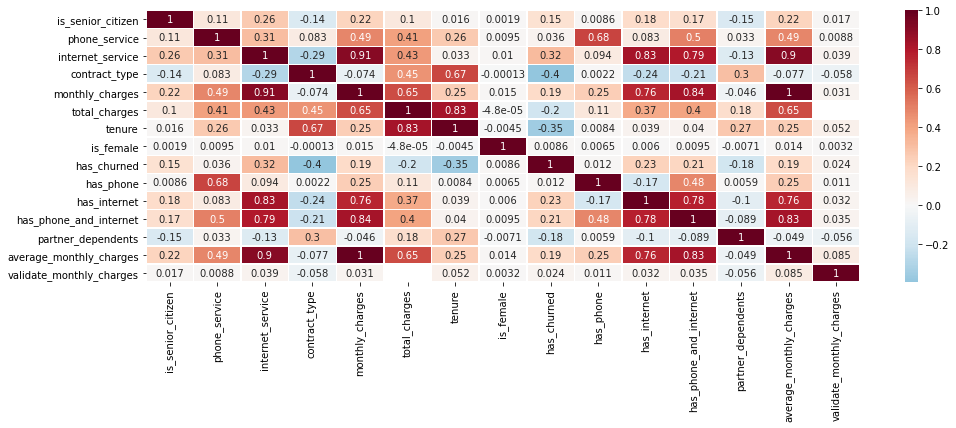

In [30]:
plt.figure(figsize = (16,5))
sns.heatmap(pearsoncorr, 
            xticklabels = pearsoncorr.columns,
            yticklabels = pearsoncorr.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 0.5,
           center = 0)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

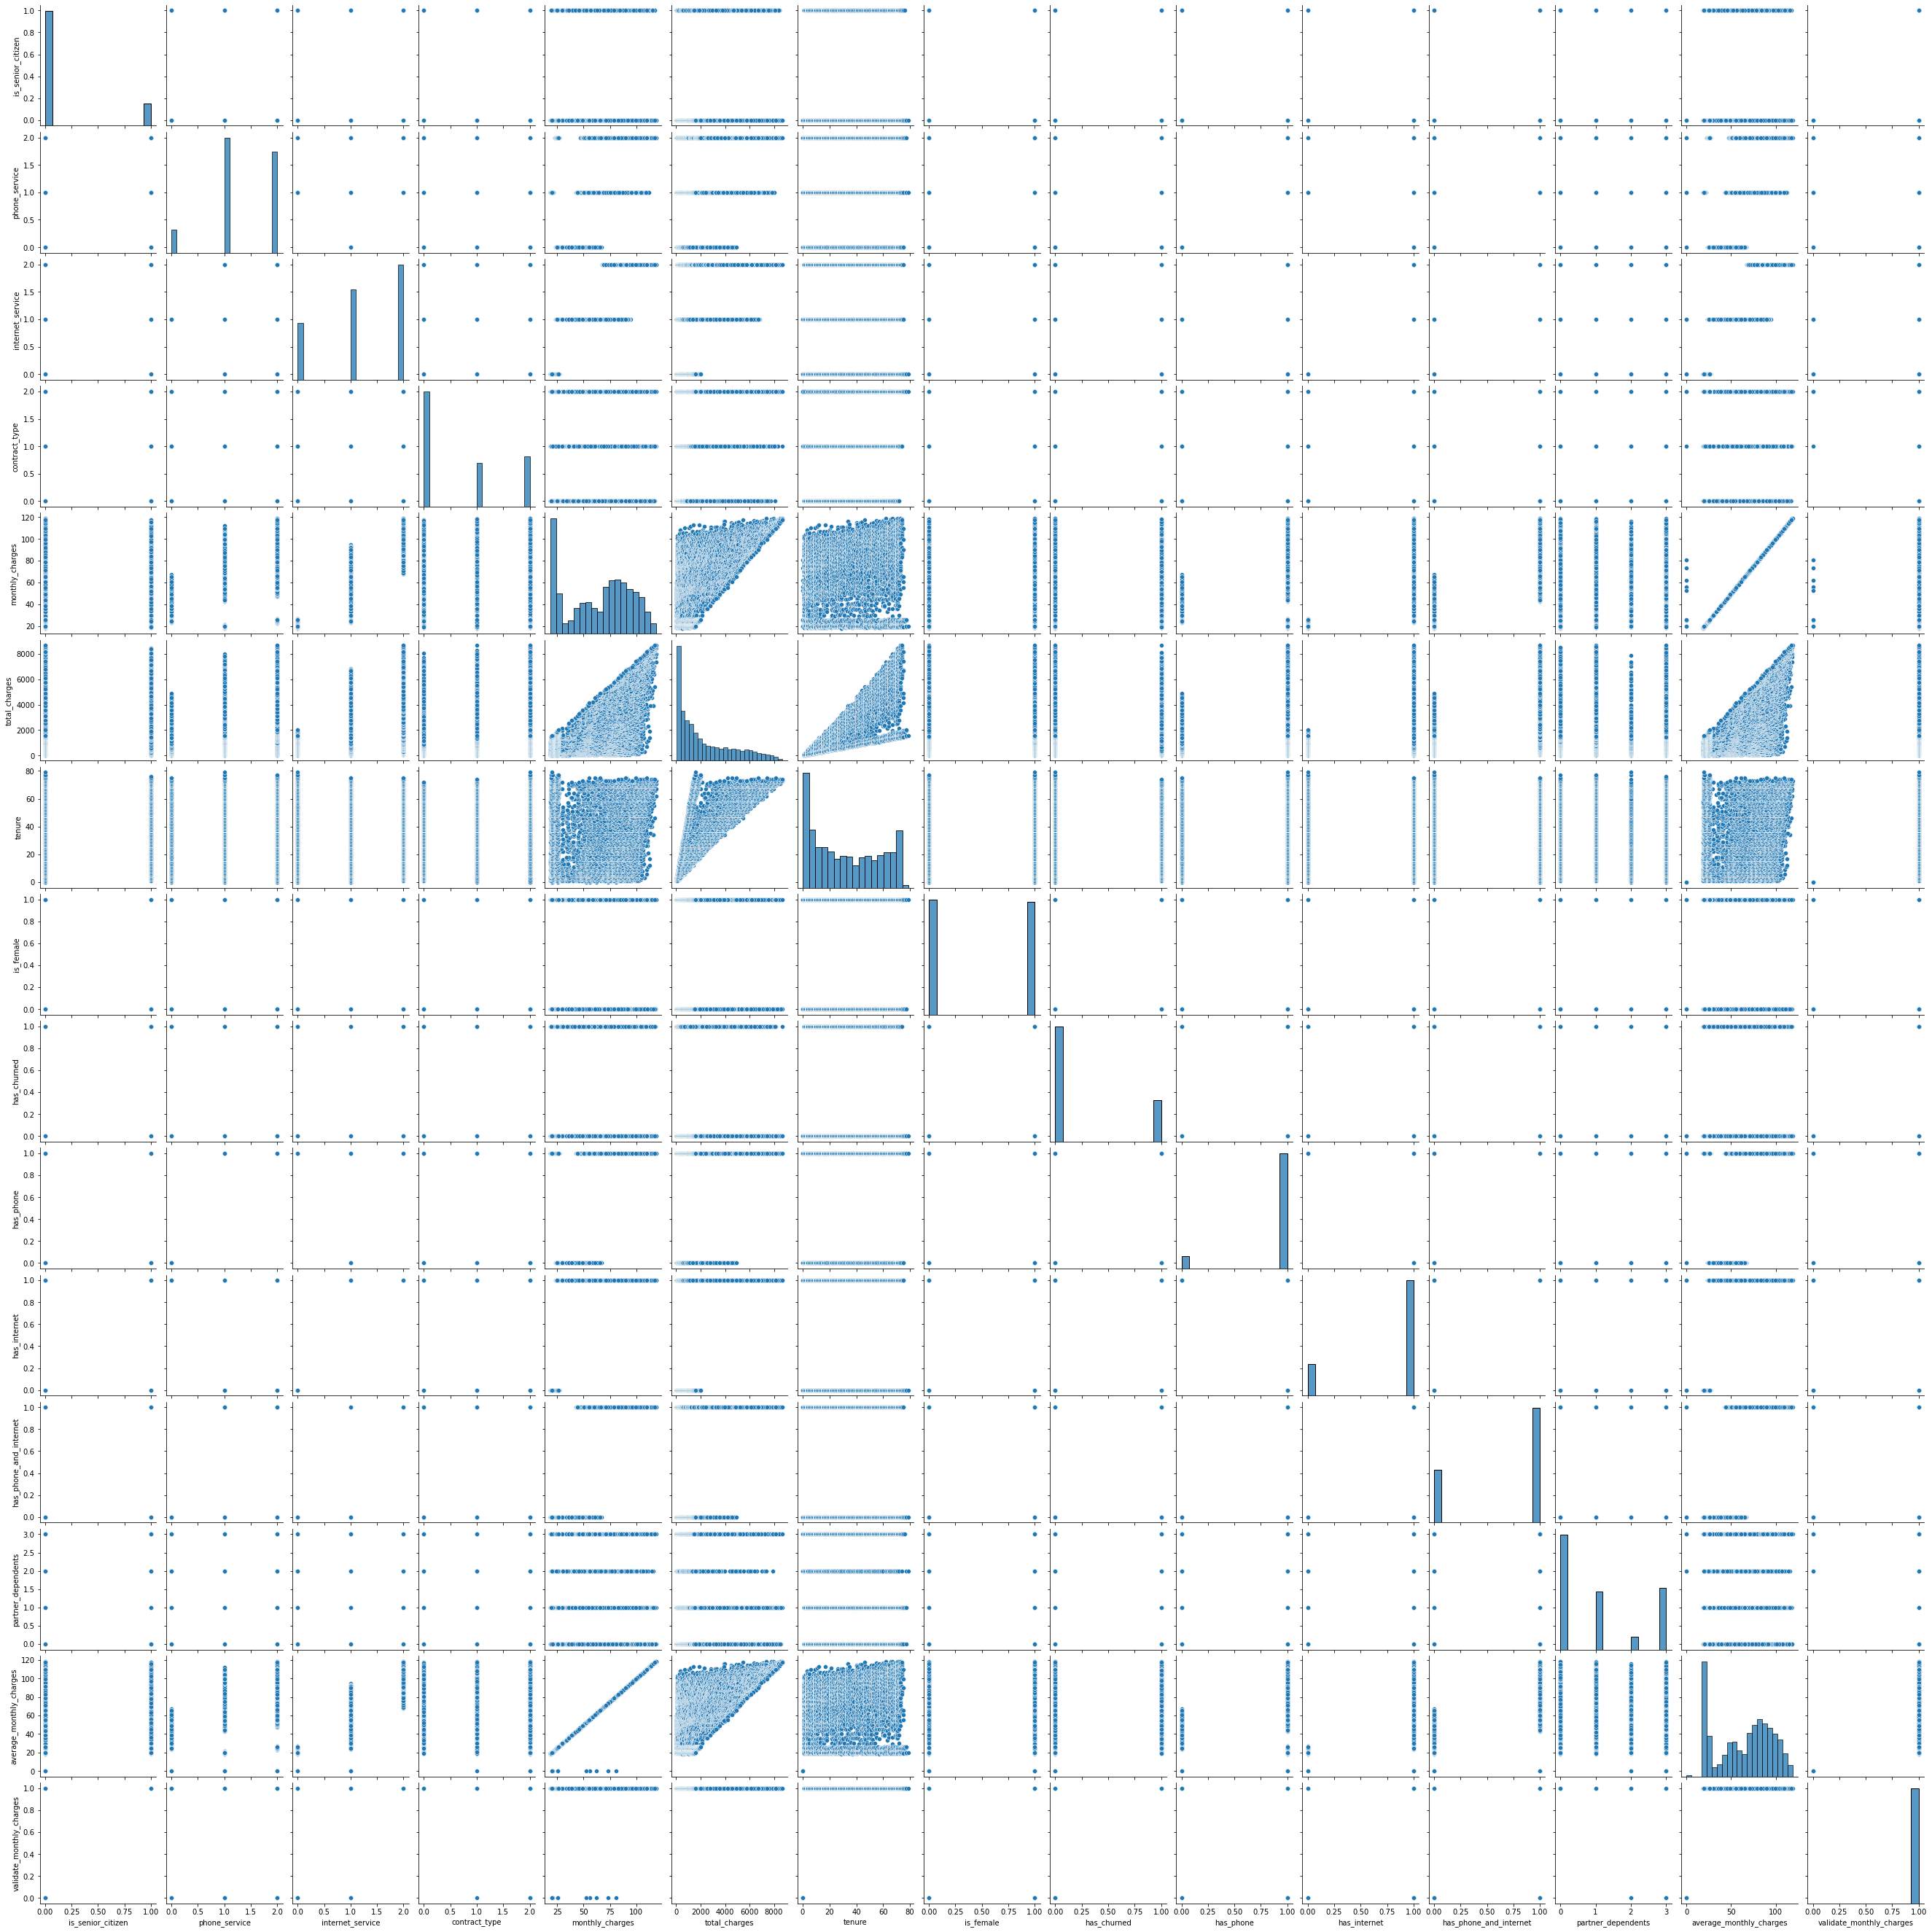

In [31]:
sns.pairplot(data = spreadsheet)

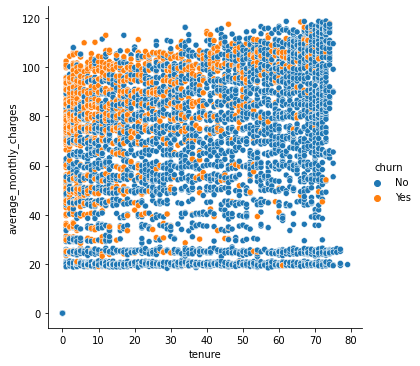

In [32]:
sns.relplot(data = spreadsheet, x = "tenure", y = "average_monthly_charges", hue = "churn")

In [33]:
monthly_customers = spreadsheet[spreadsheet["contract_type"] == 0]
monthly_customers

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
11,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,72.10,...,True,True,0,2020-01-11 14:00:00.000,72.10,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
12,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.10,...,True,False,0,2020-01-11 14:00:00.000,25.10,True,Month-to-Month,No Phone Service,DSL,Internet Only
13,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),30.50,...,True,False,3,2020-01-11 14:00:00.000,30.50,True,Month-to-Month,No Phone Service,DSL,Internet Only
14,0082-LDZUE,Male,0,No,No,1,1,0,Mailed check,44.30,...,True,True,0,2020-01-11 14:00:00.000,44.30,True,Month-to-Month,One Line,DSL,Phone+Internet
15,0107-WESLM,Male,0,No,No,1,0,0,Electronic check,19.85,...,False,False,0,2020-01-11 14:00:00.000,19.85,True,Month-to-Month,One Line,No Internet Service,Phone Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,2615-YVMYX,Male,1,Yes,No,2,2,0,Electronic check,107.50,...,True,True,1,2014-02-19 11:36:50.233,107.50,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
6767,3144-KMTWZ,Male,0,Yes,No,2,2,0,Bank transfer (automatic),93.25,...,True,True,1,2014-02-26 12:45:21.716,93.25,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
6778,3528-HFRIQ,Male,1,Yes,No,0,1,0,Bank transfer (automatic),52.30,...,True,False,1,2014-02-12 07:40:36.711,52.30,True,Month-to-Month,No Phone Service,DSL,Internet Only
6797,5287-QWLKY,Male,1,Yes,Yes,2,2,0,Credit card (automatic),105.10,...,True,True,3,2014-02-17 12:39:50.866,105.10,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet


In [34]:
yearly_customers = spreadsheet[spreadsheet["contract_type"] == 1]
yearly_customers

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,False,False,3,2020-02-11 00:00:00.000,0.00,False,1 Year,One Line,No Internet Service,Phone Only
64,1064-FBXNK,Male,0,Yes,Yes,1,0,1,Credit card (automatic),19.85,...,False,False,3,2020-01-11 14:00:00.000,19.85,True,1 Year,One Line,No Internet Service,Phone Only
146,2239-CFOUJ,Male,0,Yes,Yes,1,0,1,Mailed check,20.40,...,False,False,3,2020-01-11 14:00:00.000,20.40,True,1 Year,One Line,No Internet Service,Phone Only
198,2967-MXRAV,Male,0,Yes,Yes,1,0,1,Mailed check,18.80,...,False,False,3,2020-01-11 14:00:00.000,18.80,True,1 Year,One Line,No Internet Service,Phone Only
206,3069-SSVSN,Female,0,No,No,0,1,1,Mailed check,25.85,...,True,False,0,2020-01-11 14:00:00.000,25.85,True,1 Year,No Phone Service,DSL,Internet Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,3865-YIOTT,Male,0,Yes,Yes,2,2,1,Bank transfer (automatic),106.10,...,True,True,3,2013-12-13 23:57:10.349,106.10,True,1 Year,Two or More Lines,Fiber Optic,Phone+Internet
6992,3886-CERTZ,Female,0,Yes,No,2,2,1,Electronic check,109.25,...,True,True,1,2013-12-06 02:56:50.526,109.25,True,1 Year,Two or More Lines,Fiber Optic,Phone+Internet
6998,5168-MQQCA,Female,0,Yes,No,2,2,1,Bank transfer (automatic),108.50,...,True,True,1,2013-12-20 05:32:54.194,108.50,True,1 Year,Two or More Lines,Fiber Optic,Phone+Internet
6999,5324-KTGCG,Male,0,Yes,No,1,0,1,Electronic check,20.85,...,False,False,1,2013-12-17 18:17:15.971,20.85,True,1 Year,One Line,No Internet Service,Phone Only


In [35]:
twoyear_customers = spreadsheet[spreadsheet["contract_type"] == 2]
twoyear_customers

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,True,False,3,2020-02-11 00:00:00.000,0.00,False,2 Year,No Phone Service,DSL,Internet Only
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,False,False,3,2020-02-11 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,Phone Only
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,True,True,2,2020-02-11 00:00:00.000,0.00,False,2 Year,Two or More Lines,DSL,Phone+Internet
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,False,False,2,2020-02-11 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,Phone Only
5,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,...,False,False,3,2020-02-11 00:00:00.000,0.00,False,2 Year,Two or More Lines,No Internet Service,Phone Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3910-MRQOY,Female,0,Yes,No,1,0,2,Bank transfer (automatic),19.40,...,False,False,1,2013-09-08 18:17:00.619,19.40,True,2 Year,One Line,No Internet Service,Phone Only
7039,6010-DDPPW,Male,0,Yes,No,2,0,2,Bank transfer (automatic),25.15,...,False,False,1,2013-09-07 17:11:19.920,25.15,True,2 Year,Two or More Lines,No Internet Service,Phone Only
7040,7083-MIOPC,Female,0,No,No,1,0,2,Credit card (automatic),20.25,...,False,False,0,2013-09-01 10:13:20.000,20.25,True,2 Year,One Line,No Internet Service,Phone Only
7041,8207-VVMYB,Female,0,Yes,No,2,0,2,Bank transfer (automatic),26.00,...,False,False,1,2013-09-07 03:01:09.231,26.00,True,2 Year,Two or More Lines,No Internet Service,Phone Only


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

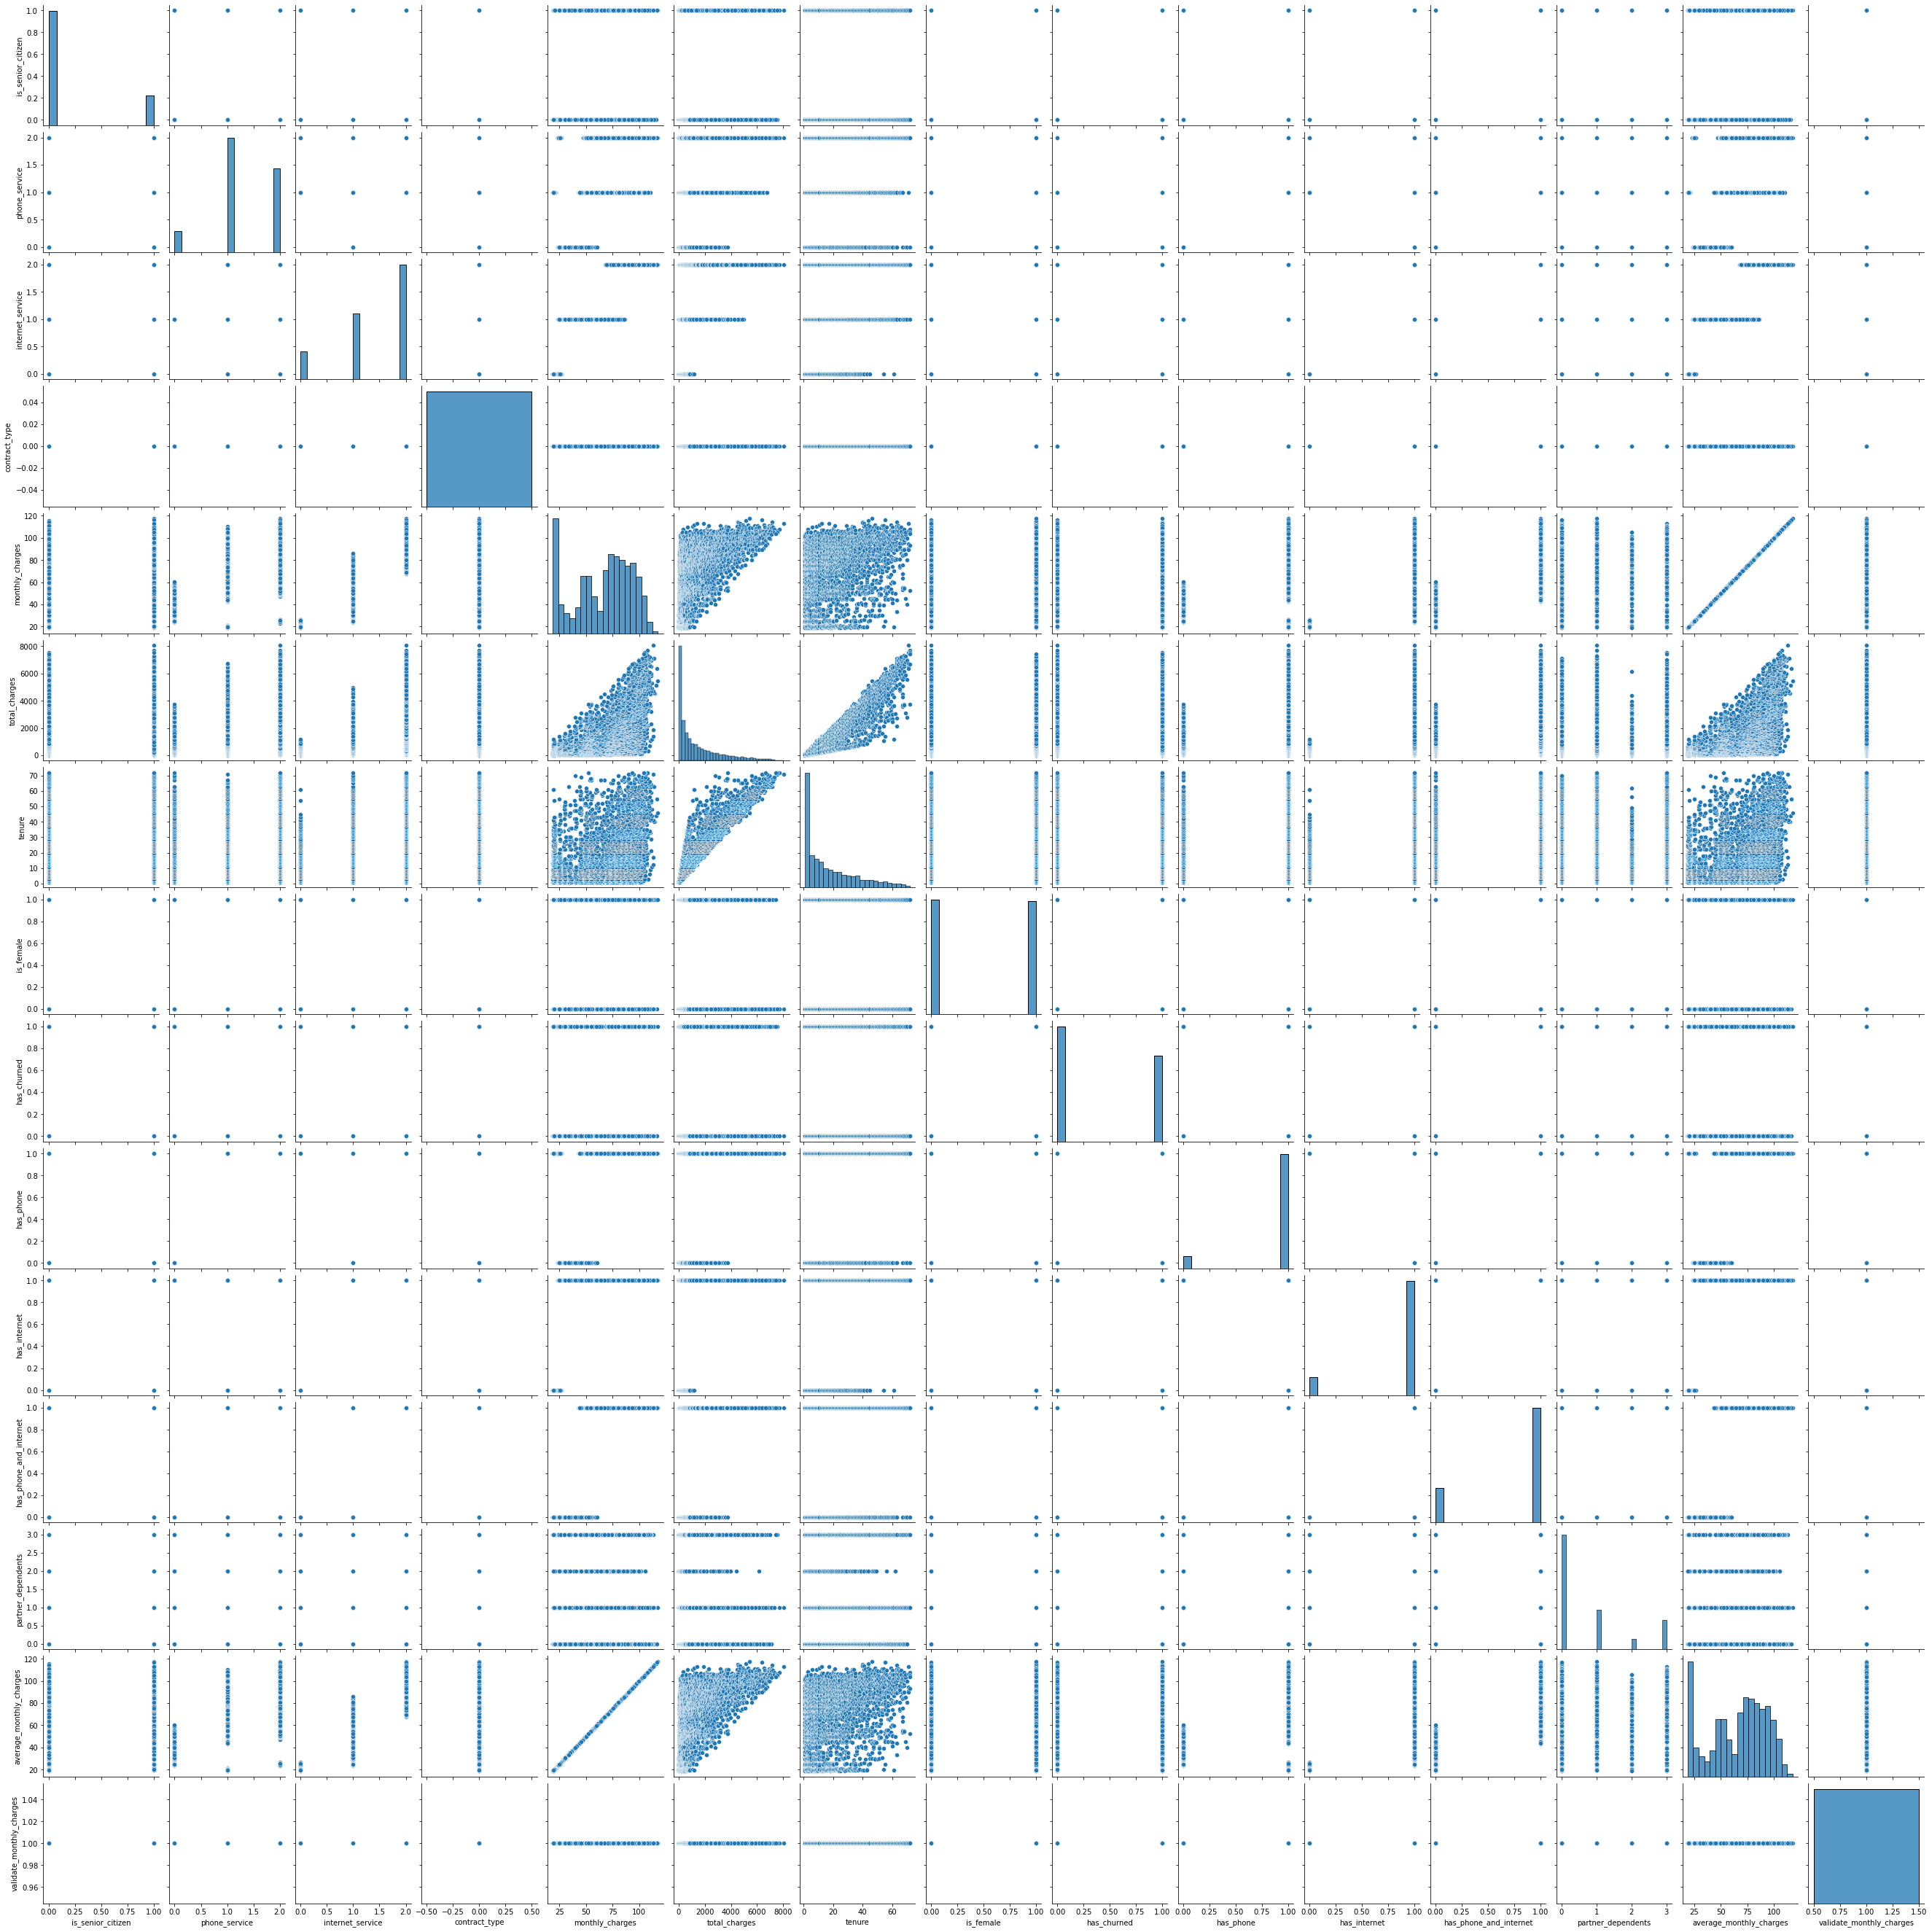

In [36]:
sns.pairplot(data = monthly_customers)

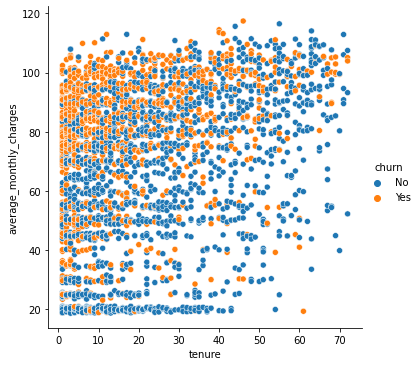

In [37]:
sns.relplot(data = monthly_customers, x = "tenure", y = "average_monthly_charges", hue = "churn")

<AxesSubplot:xlabel='payment_type', ylabel='average_monthly_charges'>

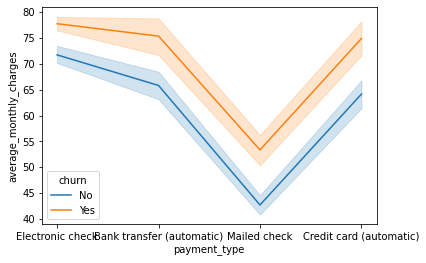

In [38]:
sns.lineplot(data = monthly_customers, x = "payment_type", y = "average_monthly_charges", hue = "churn")

<AxesSubplot:xlabel='is_senior_citizen', ylabel='average_monthly_charges'>

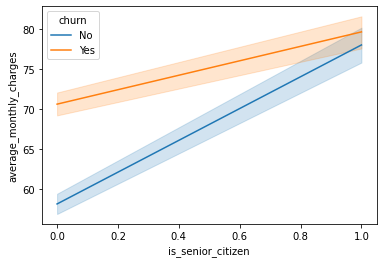

In [39]:
sns.lineplot(data = monthly_customers, x = "is_senior_citizen", y = "average_monthly_charges", hue = "churn")

In [40]:
pearsons4monthly = monthly_customers.corr(method = 'pearson')
pearsons4monthly

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_monthly_charges,validate_monthly_charges
is_senior_citizen,1.000000,0.137672,0.257269,NaN,0.237777,0.189570,0.148094,-0.002411,0.123767,-0.001492,0.180508,0.145133,-0.100278,0.237777,NaN
phone_service,0.137672,1.000000,0.407288,NaN,0.580371,0.414309,0.269267,-0.002808,0.079908,0.667905,0.123876,0.568500,0.017908,0.580371,NaN
internet_service,0.257269,0.407288,1.000000,NaN,0.909762,0.423347,0.246908,0.010214,0.275275,0.189442,0.780604,0.764942,-0.041778,0.909762,NaN
contract_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_charges,0.237777,0.580371,0.909762,NaN,1.000000,0.567359,0.361910,0.009379,0.212332,0.360130,0.675471,0.799451,0.001344,1.000000,NaN
total_charges,0.189570,0.414309,0.423347,NaN,0.567359,1.000000,0.930096,-0.009544,-0.109578,0.123991,0.289163,0.321084,0.145836,0.567359,NaN
tenure,0.148094,0.269267,0.246908,NaN,0.361910,0.930096,1.000000,-0.003316,-0.195665,-0.010493,0.198625,0.153495,0.184762,0.361910,NaN
is_female,-0.002411,-0.002808,0.010214,NaN,0.009379,-0.009544,-0.003316,1.000000,0.020700,-0.002115,0.006505,0.003785,0.011619,0.009379,NaN
has_churned,0.123767,0.079908,0.275275,NaN,0.212332,-0.109578,-0.195665,0.020700,1.000000,0.013375,0.190394,0.163560,-0.098265,0.212332,NaN
has_phone,-0.001492,0.667905,0.189442,NaN,0.360130,0.123991,-0.010493,-0.002115,0.013375,1.000000,-0.129628,0.595997,-0.000783,0.360130,NaN


<AxesSubplot:>

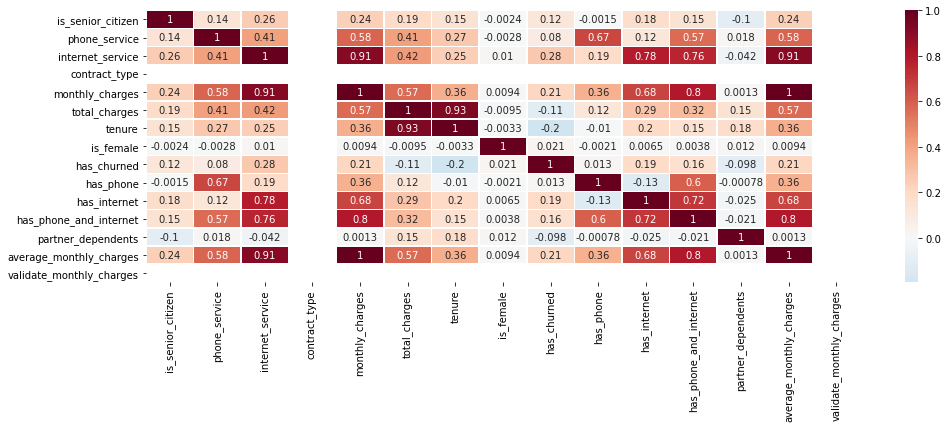

In [41]:
plt.figure(figsize = (16,5))
sns.heatmap(pearsons4monthly, 
            xticklabels = pearsoncorr.columns,
            yticklabels = pearsoncorr.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 0.5,
           center = 0)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='tenure', ylabel='payment_type'>

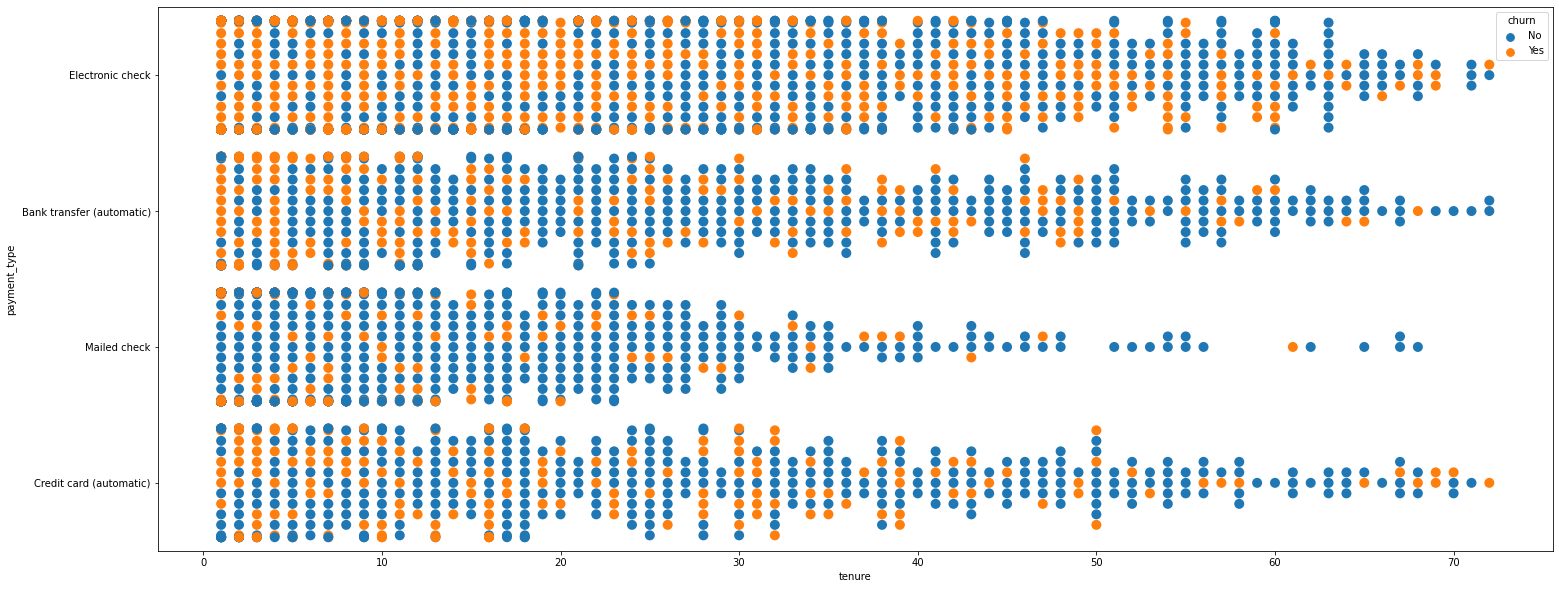

In [42]:
plt.figure(figsize = (25,10))
sns.swarmplot(data = monthly_customers, x = "tenure", y = "payment_type", hue = "churn", size = 10)

<Figure size 1152x360 with 0 Axes>

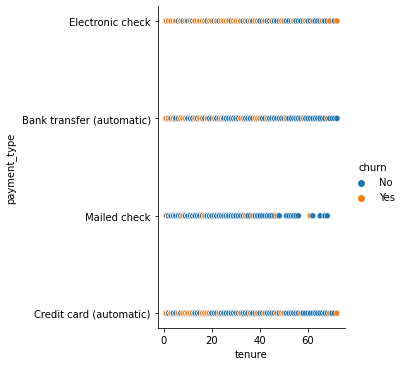

In [43]:
plt.figure(figsize = (16,5))
sns.relplot(data = monthly_customers, x = "tenure", y = "payment_type", hue = "churn")

<AxesSubplot:xlabel='payment_type', ylabel='tenure'>

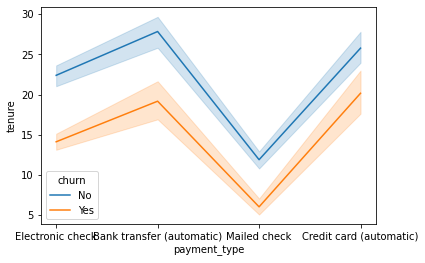

In [44]:
sns.lineplot(data = monthly_customers, x = "payment_type", y = "tenure", hue = "churn")

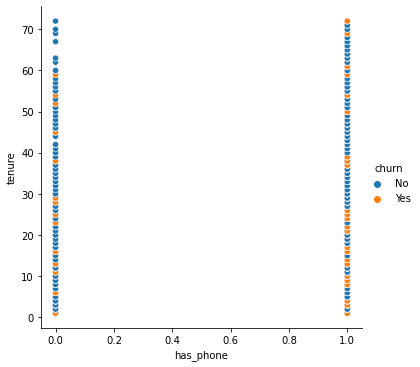

In [45]:
sns.relplot(data = monthly_customers, x = "has_phone", y = "tenure", hue = "churn")

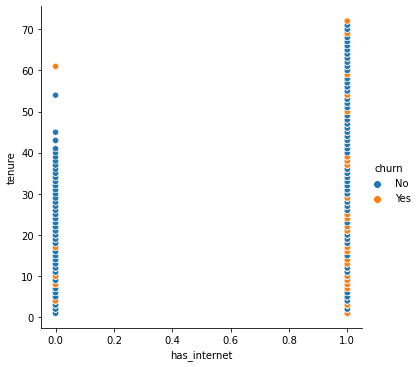

In [46]:
sns.relplot(data = monthly_customers, x = "has_internet", y = "tenure", hue = "churn")

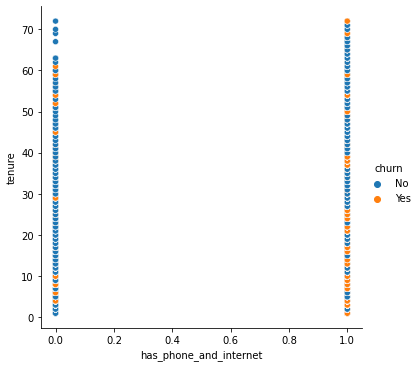

In [47]:
sns.relplot(data = monthly_customers, x = "has_phone_and_internet", y = "tenure", hue = "churn")

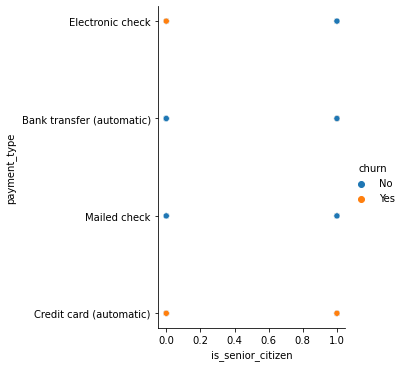

In [48]:
sns.relplot(data = monthly_customers, x = "is_senior_citizen", y = "payment_type", hue = "churn")


In [118]:
total_churners = spreadsheet.groupby(["contract_type_desc"])[["has_churned"]].count()#.iloc[:,14].sort_values(ascending = True).head(1) #[spreadsheet['has_churned'] == True] #monthly_customers[monthly_customers["has_churned" == True]].value_counts()
total_churners

,has_churned
contract_type_desc,
1 Year,1473
2 Year,1695
Month-to-Month,3875


In [134]:
churner_groups = spreadsheet.groupby(["contract_type_desc", "has_churned"]).count().iloc[:,14].sort_values(ascending = False)
churner_groups

contract_type_desc  has_churned
Month-to-Month      False          2220
                    True           1655
2 Year              False          1647
1 Year              False          1307
                    True            166
2 Year              True             48
Name: has_phone, dtype: int64

In [179]:
total_churners = spreadsheet.groupby("contract_type_desc")[['has_churned']].sum().sort_values(by = "has_churned", ascending = False)
total_churners

,has_churned
contract_type_desc,
Month-to-Month,1655
1 Year,166
2 Year,48


In [138]:
monthly_churners = spreadsheet.groupby("contract_type_desc")[['has_churned']].sum().sort_values(by = "contract_type_desc", ascending = False).head(1)
monthly_churners

,has_churned
contract_type_desc,
Month-to-Month,1655


In [140]:
annual_churners = spreadsheet.groupby("contract_type_desc")[['has_churned']].sum().sort_values(by = "contract_type_desc", ascending = True).head(1)
annual_churners

,has_churned
contract_type_desc,
1 Year,166


In [156]:
biannual_churners = spreadsheet.groupby("contract_type_desc")[['has_churned']].sum().sort_values(by = "has_churned").head(1)
biannual_churners
#biannual_churners2 = biannual_churners[biannual_churners["contract_type_desc"] == "2 Year"]

,has_churned
contract_type_desc,
2 Year,48


<AxesSubplot:xlabel='contract_type_desc'>

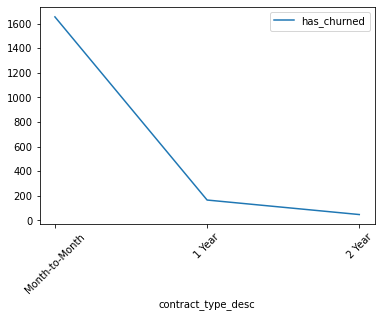

In [191]:
plt.xticks(rotation=45)
total_churners_plot = sns.lineplot(data = total_churners)
